In [1]:
# Chargement des librairies

library(sparklyr)
library(tidyverse, warn.conflicts = FALSE)
library(lubridate)
library(ggsci)
library(infer)

# Connexion à Spark

config <- spark_config()
sc <- spark_connect(master = "yarn-cluster", config = config, version = '2.4.3')


Attaching package: ‘sparklyr’


The following object is masked from ‘package:SparkR’:

    collect


Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.4.3     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()      masks SparkR::arrange()
✖ dplyr::between()      masks SparkR::between()
✖ dplyr::coalesce()     masks SparkR::coalesce()
✖ dplyr::collect()      masks sparklyr::collect(), SparkR::collect()
✖ dplyr::contains()     masks tidyr::contains(), SparkR::contains()
✖ dplyr::count()        masks SparkR::count()
✖ dplyr::cume_dist()    masks SparkR::cume_dist()
✖ dplyr::dense_rank()   masks SparkR::dense_rank()
✖ dplyr::desc()         masks SparkR::desc()
✖ dplyr::distinct()     masks SparkR::distinct()
✖ dplyr::expl

In [2]:
spark_read_parquet(sc, 'donnees_aggregees_filtrees_anticoag', 'donnees_aggregees_filtrees_anticoag')

# Source: spark<donnees_aggregees_filtrees_anticoag> [?? x 17]
   instance_num encounter_num        nb_total_tests_par_sejour duree_sejour
   <chr>        <chr>                                    <dbl>        <dbl>
 1 11631639416  -3775853939986390367                         9            7
 2 12981681338  -388213658652744528                          3            3
 3 12981734902  -9097925098844565662                         5            7
 4 14036503075  -1537084672087933863                         3            9
 5 142001843    -680819731703896309                          3            7
 6 142238454    -1489499003224630847                        12           14
 7 14350839928  4835772296449855757                          7           22
 8 14913511493  -151545882290912413                          1           20
 9 15060910152  4585203080107409208                          3            3
10 155240082    1243472077648777773                          1            6
# ℹ more rows
# ℹ 13 more

In [3]:
donnees_aggregees_filtrees_anticoag <- sc %>% tbl('donnees_aggregees_filtrees_anticoag')

In [4]:
# Chargement des tables de data_management

tbl_change_db(sc, 'cse_200007_work')

spark_read_parquet(sc, 'sejours_rea_48_heures', 'sejours_rea_48_heures')
spark_read_parquet(sc, 'anticoag_patients_sejours_rea', 'anticoag_patients_sejours_rea')
spark_read_parquet(sc, 'labos_patients_sejours_rea', 'labos_patients_sejours_rea')
spark_read_parquet(sc, 'donnees_aggregees_labos', 'donnees_aggregees_labos')
spark_read_parquet(sc, 'donnees_aggregees_anticoag', 'donnees_aggregees_anticoag')
spark_read_parquet(sc, 'donnees_aggregees_filtrees_anticoag', 'donnees_aggregees_filtrees_anticoag')

# Source: spark<sejours_rea_48_heures> [?? x 137]
   encounter_num        location_cd chads_vasc patient_num   start_date_stay    
   <chr>                <chr>            <dbl> <chr>         <dttm>             
 1 1752665996291562278  UFR:026514           5 -44776191188… 2020-03-26 17:34:00
 2 -1216813316260103597 UFR:047242           4 503041227234… 2020-04-28 00:22:00
 3 5231337347460984291  UFR:021034           1 630754093753… 2020-08-20 15:02:00
 4 4488450525641231673  UFR:010030           1 -76298360079… 2015-10-25 21:25:00
 5 7528092672442711970  UFR:014025           4 309675344945… 2016-03-26 10:48:00
 6 -5245953818264138025 UFR:087260           2 424144902461… 2016-03-31 10:44:00
 7 5141568838889163811  UFR:066228           1 152722916276… 2020-10-28 10:00:00
 8 -2051142377238092640 UFR:095013           1 799828159422… 2020-11-28 13:10:00
 9 22559297188542165    UFR:014025           1 -70001673345… 2013-09-26 14:31:00
10 8705411307031176160  UFR:014025           5 777880438427

# Source: spark<anticoag_patients_sejours_rea> [?? x 26]
   encounter_num   patient_num concept_cd instance_num_lab nval_num quantity_num
   <chr>           <chr>       <chr>      <chr>               <dbl>        <dbl>
 1 -8371677380891… -210723128… LAB:A0350  570936238368671…     0.28          0.3
 2 -1715734469923… 6474626658… LAB:A0350  835087526167559…     0.1           0.3
 3 -1715734469923… 6474626658… LAB:A0350  -73544644586998…     0.42          0.3
 4 74702744951402… 1139430206… LAB:A0018  262858875554357…     0.33        NaN  
 5 51062603759991… 5985875502… LAB:A0350  -58279924586955…     0.31          0.3
 6 51062603759991… 5985875502… LAB:A0350  -79468161444009…     0.48          0.3
 7 51062603759991… 5985875502… LAB:A0350  -64882142008186…     0.33          0.3
 8 -6862206291490… -907720941… LAB:A0350  830575414553494…     0.75        NaN  
 9 51062603759991… 5985875502… LAB:A0350  -57336515953517…     0.12          0.3
10 51062603759991… 5985875502… LAB:A0350  -659043768

# Source: spark<labos_patients_sejours_rea> [?? x 26]
   start_date_lab      nval_num encounter_num  patient_num quantity_num units_cd
   <dttm>                 <dbl> <chr>          <chr>              <dbl> <chr>   
 1 2014-05-14 04:00:00    252   -529916748558… 5392932707…         55   µmol/L  
 2 2014-05-14 04:00:00     12.9 -529916748558… 5392932707…          2.5 mmol/L  
 3 2014-05-13 16:10:00      9.1 -529916748558… 5392932707…         13   g/dL    
 4 2014-05-11 19:30:00      3.5 2803733602221… 6645963747…          2   g/L     
 5 2014-05-19 05:30:00    285   -529916748558… 5392932707…         55   µmol/L  
 6 2014-05-19 05:30:00     16.1 -529916748558… 5392932707…          2.5 mmol/L  
 7 2014-05-11 19:30:00     10.1 2803733602221… 6645963747…         13   g/dL    
 8 2014-05-11 19:30:00    300   2803733602221… 6645963747…        150   x10*9/L 
 9 2014-05-18 04:00:00      8   -529916748558… 5392932707…         13   g/dL    
10 2014-05-18 04:00:00    113   -529916748558… 53929327

# Source: spark<donnees_aggregees_labos> [?? x 10]
   instance_num concept_cd_cat nb_tests moyenne mediane    min    max    sd
   <chr>        <chr>             <dbl>   <dbl>   <dbl>  <dbl>  <dbl> <dbl>
 1 10437205242  hemoglobine          69    8.77    8      6.6   18.3   2.4 
 2 10632278470  fibrinogene           4    4.58    4.65   3.94   5.06  0.47
 3 10914226309  uree                  5    7.8     8      5.4   10.4   2   
 4 11100428060  fibrinogene           3    3.7     3.4    2.5    5.2   1.37
 5 11410731089  plaquettes            4  164.    156.   129    215    38.8 
 6 11591175841  uree                  4    9.45    9.15   8.3   11.2   1.27
 7 11631641428  creat                 8  121.    128.    91    143    18.4 
 8 12206063411  uree                 11   18.5    18.8   17.2   19.7   0.85
 9 130063654    plaquettes           12  305.    290.   256    402    45.6 
10 133330119    uree                 30   12.0    12.2    6     19.3   3.96
# ℹ more rows
# ℹ 2 more variables: q

# Source: spark<donnees_aggregees_anticoag> [?? x 14]
   instance_num encounter_num        nb_total_tests_par_sejour duree_sejour
   <chr>        <chr>                                    <dbl>        <dbl>
 1 11631639416  -3775853939986390367                         9            7
 2 12981681338  -388213658652744528                          3            3
 3 12981734902  -9097925098844565662                         5            7
 4 14036503075  -1537084672087933863                         3            9
 5 142001843    -680819731703896309                          3            7
 6 142238454    -1489499003224630847                        12           14
 7 14350839928  4835772296449855757                          7           22
 8 14913511493  -151545882290912413                          1           20
 9 15060910152  4585203080107409208                          3            3
10 155240082    1243472077648777773                          1            6
# ℹ more rows
# ℹ 10 more variable

# Source: spark<donnees_aggregees_filtrees_anticoag> [?? x 17]
   instance_num encounter_num        nb_total_tests_par_sejour duree_sejour
   <chr>        <chr>                                    <dbl>        <dbl>
 1 11631639416  -3775853939986390367                         9            7
 2 12981681338  -388213658652744528                          3            3
 3 12981734902  -9097925098844565662                         5            7
 4 14036503075  -1537084672087933863                         3            9
 5 142001843    -680819731703896309                          3            7
 6 142238454    -1489499003224630847                        12           14
 7 14350839928  4835772296449855757                          7           22
 8 14913511493  -151545882290912413                          1           20
 9 15060910152  4585203080107409208                          3            3
10 155240082    1243472077648777773                          1            6
# ℹ more rows
# ℹ 13 more

In [5]:
# Création des tibbles correspondant aux tables créées dans data_management

sejours_rea_48_heures <- sc %>% tbl('sejours_rea_48_heures')
anticoag_patients_sejours_rea <- sc %>% tbl('anticoag_patients_sejours_rea')
labos_patients_sejours_rea <- sc %>% tbl('labos_patients_sejours_rea')
donnees_aggregees_labos <- sc %>% tbl('donnees_aggregees_labos')
donnees_aggregees_anticoag <- sc %>% tbl('donnees_aggregees_anticoag')
donnees_aggregees_filtrees_anticoag <- sc %>% tbl('donnees_aggregees_filtrees_anticoag')

In [7]:
# Sélection du schéma FA

tbl_change_db(sc, 'cse_200007_20210519')

In [8]:
# Définition des variables

# Codes Labo Hémostase :
## AntiXa-HNF : LAB:A0350, LAB:G1986, LAB:E3109,
## AntiXa-HBPM : LAB:A0018, LAB:E3108
## Danaparoïde sodique : LAB:A0019, LAB:A2662, LAB:H6291, LAB:D9103
## TCA : LAB:A0265 (Patient), LAB:A0266 (Témoin), LAB:A1792 (Ratio)
## INR : LAB:A0269, LAB:F5455
## AOD : LAB:E5350 (Rivaroxaban), LAB:F8012 (Apixaban), LAB:H3248 (Edoxaban)

lab_antiXa_hnf <- c ('LAB:A0350', 'LAB:G1986', 'LAB:E3109')
lab_antiXa_hbpm <- c ('LAB:A0018', 'LAB:E3108')
lab_tca_ratio <- c ('LAB:A1792')
lab_aod <- c('LAB:E5350', 'LAB:F8012', 'LAB:H3248')

lab_tous_tests <- c(lab_antiXa_hnf,lab_antiXa_hbpm,lab_tca_ratio,lab_aod)
lab_tous_tests_sans_tca <- c(lab_antiXa_hnf,lab_antiXa_hbpm,lab_aod)
print(lab_tous_tests)

[1] "LAB:A0350" "LAB:G1986" "LAB:E3109" "LAB:A0018" "LAB:E3108" "LAB:A1792"
[7] "LAB:E5350" "LAB:F8012" "LAB:H3248"


In [78]:
# Nombre de séjours de réanimation avec au moins un examen d'hémostase

anticoag_patients_sejours_rea %>%
    collect() %>%
    count(patient_num) %>%
    count()

n
<int>
2010


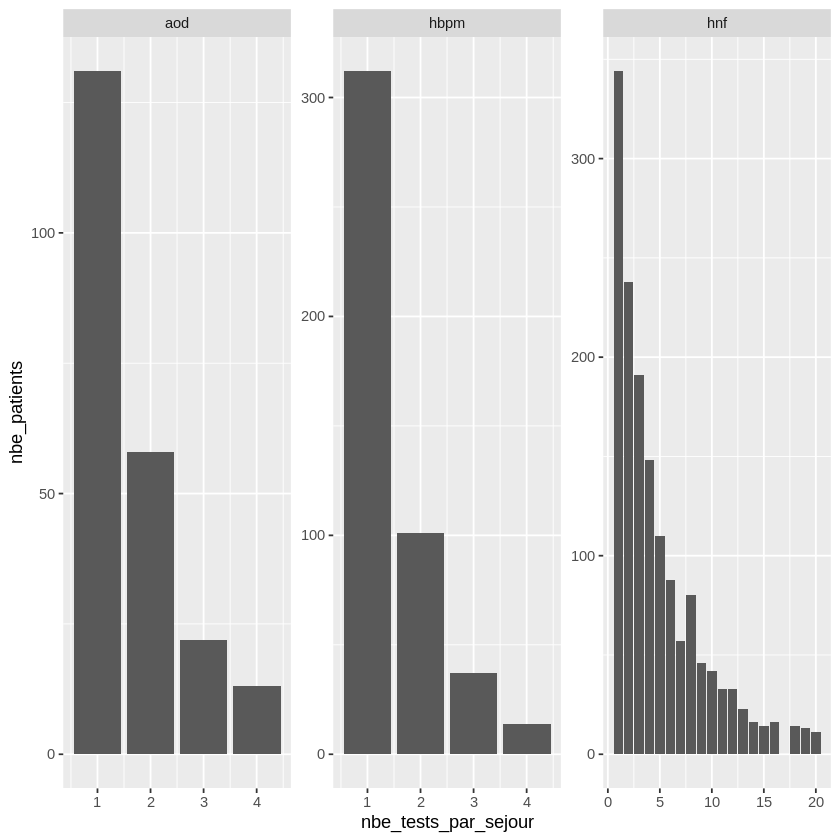

In [79]:
# Nombre de tests d'anticoagulation reçus pour chaque séjour de réanimation

## Tous tests confondus

anticoag_patients_sejours_rea %>%

### "pour chaque séjour de réanimation"
    group_by(instance_num, type_anticoag) %>%
    summarise(nbe_tests_par_sejour = n()) %>%
    group_by(nbe_tests_par_sejour, type_anticoag) %>%
    summarise(nbe_patients = n()) %>%
    filter(nbe_patients > 10) %>%
    ggplot() + geom_col(aes(x = nbe_tests_par_sejour, y = nbe_patients)) + facet_wrap(~type_anticoag, scale = "free")

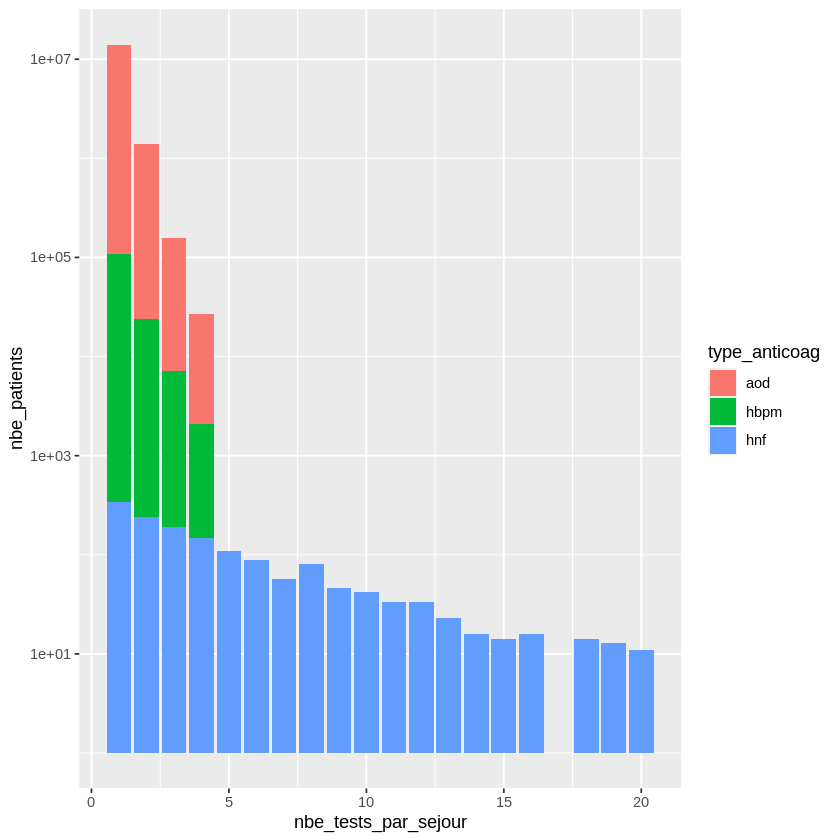

In [80]:
# Nombre de tests d'anticoagulation reçus pour chaque séjour de réanimation

anticoag_patients_sejours_rea %>%

## Tous tests confondus mis à part le TCA
    filter(concept_cd %in% lab_tous_tests_sans_tca) %>%

### "pour chaque séjour de réanimation"
    group_by(instance_num, type_anticoag) %>%
    summarise(nbe_tests_par_sejour = n()) %>%
    group_by(nbe_tests_par_sejour, type_anticoag) %>%
    summarise(nbe_patients = n()) %>%
    filter(nbe_patients > 10) %>%
    ggplot() + geom_col(aes(x = nbe_tests_par_sejour, y = nbe_patients, fill = type_anticoag)) + scale_y_continuous(trans = "log10")

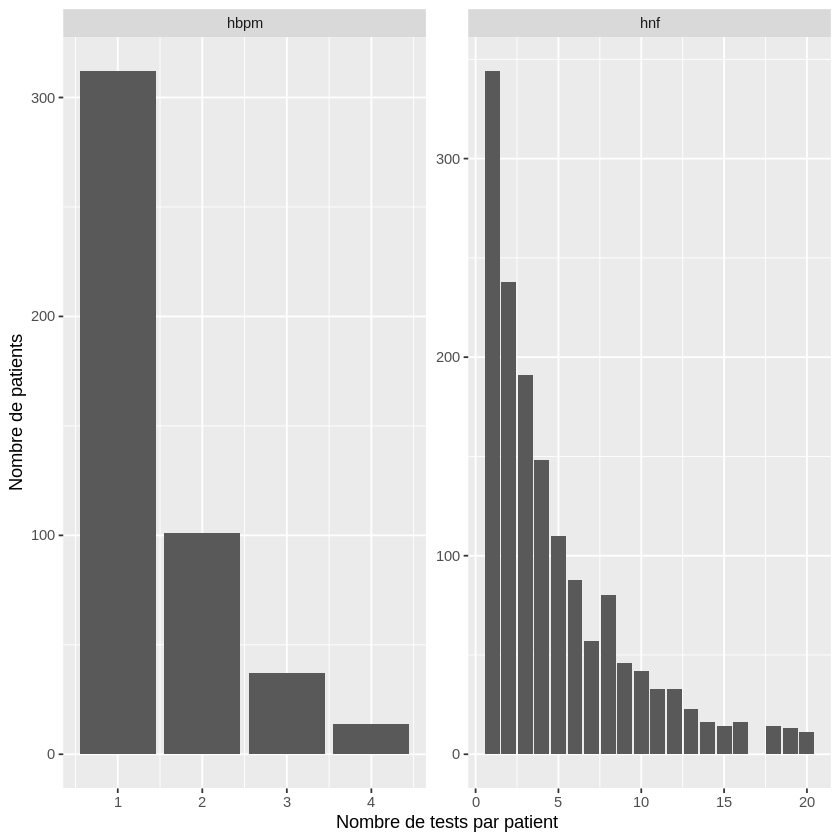

In [81]:
# Nombre de tests d'anticoagulation reçus pour chaque séjour de réanimation

## Tous tests confondus

anticoag_patients_sejours_rea %>%
    filter(type_anticoag != 'aod') %>%

### "pour chaque séjour de réanimation"
    group_by(instance_num, type_anticoag) %>%
    summarise(nbe_tests_par_sejour = n()) %>%
    group_by(nbe_tests_par_sejour, type_anticoag) %>%
    summarise(nbe_patients = n()) %>%
    filter(nbe_patients > 10) %>%
    ggplot() + geom_col(aes(x = nbe_tests_par_sejour, y = nbe_patients)) + 
        facet_wrap(~type_anticoag, scale = "free") +
        xlab('Nombre de tests par patient') +
        ylab('Nombre de patients')

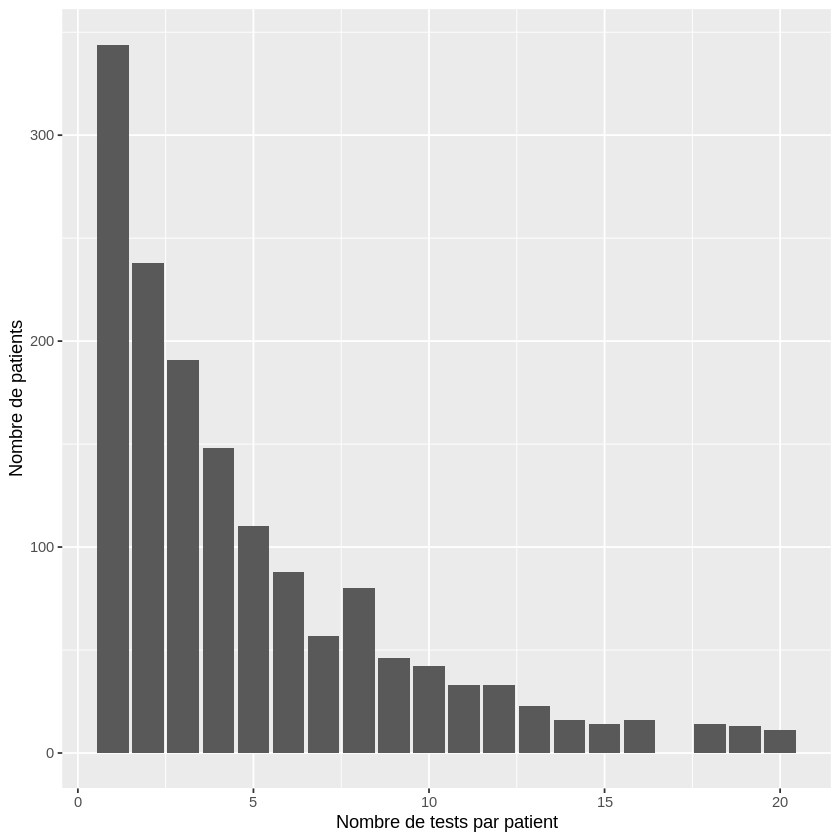

In [82]:
## Anti-Xa HNF
anticoag_patients_sejours_rea %>%
    filter(concept_cd %in% lab_antiXa_hnf) %>%

### "pour chaque séjour de réanimation"
    group_by(instance_num) %>%

    summarise(nbe_tests_par_sejour = n()) %>%
    group_by(nbe_tests_par_sejour) %>%
    summarise(nbe_patients = n()) %>%
    filter(nbe_patients > 10) %>%
    ggplot(aes(x = nbe_tests_par_sejour, y = nbe_patients)) + geom_col() +
        xlab('Nombre de tests par patient') +
        ylab('Nombre de patients')

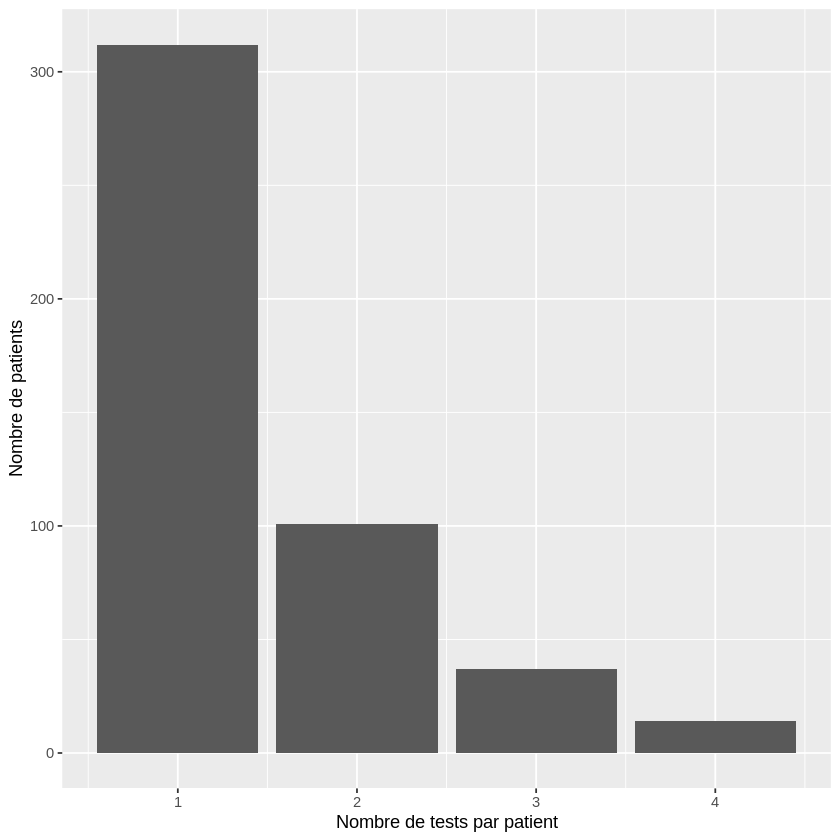

In [83]:
## Anti-Xa HBPM
anticoag_patients_sejours_rea %>%
    filter(concept_cd %in% lab_antiXa_hbpm) %>%

### "pour chaque séjour de réanimation"
    group_by(instance_num) %>%

    summarise(nbe_tests_par_sejour = n()) %>%
    group_by(nbe_tests_par_sejour) %>%
    summarise(nbe_patients = n()) %>%
    filter(nbe_patients > 10) %>%
    ggplot(aes(x = nbe_tests_par_sejour, y = nbe_patients)) + geom_col() +
        xlab('Nombre de tests par patient') +
        ylab('Nombre de patients')

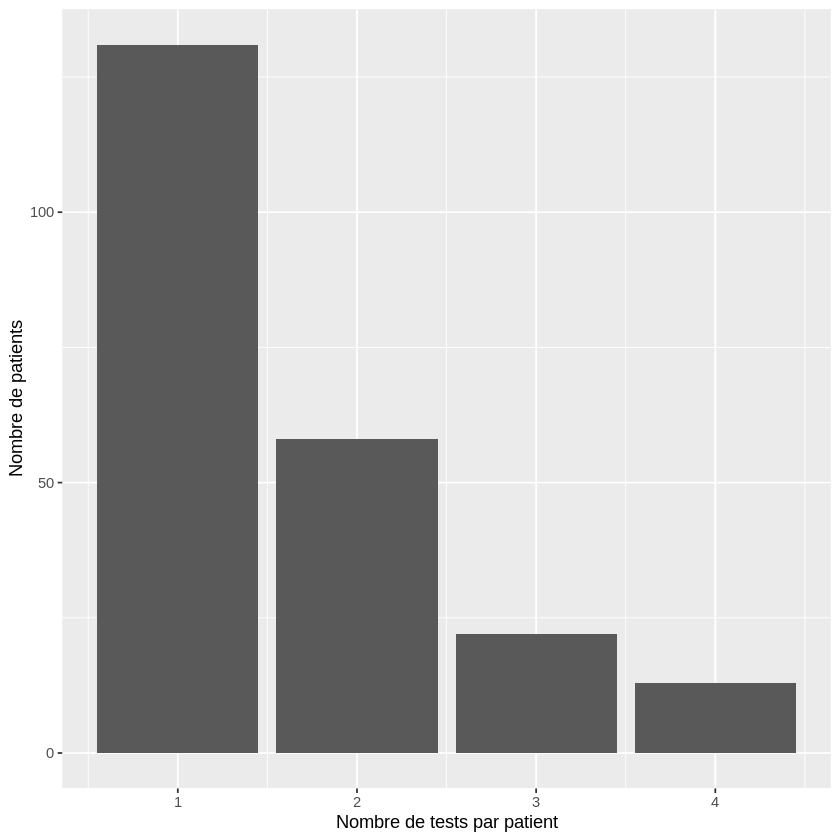

In [84]:
## AOD
anticoag_patients_sejours_rea %>%
    filter(concept_cd %in% lab_aod) %>%

### "pour chaque séjour de réanimation"
    group_by(instance_num) %>%

    summarise(nbe_tests_par_sejour = n()) %>%
    group_by(nbe_tests_par_sejour) %>%
    summarise(nbe_patients = n()) %>%
    filter(nbe_patients > 5) %>%
    ggplot(aes(x = nbe_tests_par_sejour, y = nbe_patients)) + geom_col() +
        xlab('Nombre de tests par patient') +
        ylab('Nombre de patients')

In [85]:
summary_anticoag_sejours_rea <- anticoag_patients_sejours_rea %>%
    group_by(instance_num, type_anticoag) %>%
    summarise (nb_tests = n(), 
               moyenne = round(mean(nval_num),2),
               mediane = round(percentile(nval_num,0.5),2),
               min = min(nval_num), 
               max = max(nval_num), 
               sd = round(sd(nval_num),2), 
               q25=round(percentile(nval_num,0.25),2), 
               q75=round(percentile(nval_num,0.75),2))

In [86]:
donnees_aggregees_anticoag %>%
    group_by(type_anticoag) %>%
    summarise(nb_sejours = n(),
              nb_tests_moy = round(mean(nb_tests),2),
              nb_tests_max = max(nb_tests),
              nb_tests_min = min(nb_tests),
              moyenne = round(mean(moyenne),2),
              mediane = round(percentile(mediane,0.5),2)) %>%
    as_tibble()

type_anticoag,nb_sejours,nb_tests_moy,nb_tests_max,nb_tests_min,moyenne,mediane
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hbpm,484,1.69,10,1,0.39,0.28
aod,230,1.74,7,1,97.77,63.96
hnf,1609,6.36,67,1,0.31,0.21


In [87]:
# Nombre de séjours ayant eu des tests d'anticoagulation différents 

donnees_aggregees_anticoag %>%
    collect() %>%
    group_by(instance_num) %>%
    summarise(nbe_anticoag = n()) %>%
    group_by (nbe_anticoag) %>%
    count() %>%
    arrange(nbe_anticoag)

nbe_anticoag,n
<int>,<int>
1,1707
2,293
3,10


In [88]:
## Séjours filtrés (depuis la table data_management) comme étant ceux qu'on a voulu anticoaguler et qui ne l'ont pas été
## Différences d'envir

donnees_aggregees_filtrees_anticoag %>%
    collect() %>%
    filter(efficacite_anticoag == 'inefficace') %>%
    count()

n
<int>
152


In [89]:
## Table résumant les caractéristiques des tests d'hémostase pour les séjours de réanimation (table anticoag_patients_sejours_rea)
## en fonction des types de tets de la coagulation pratiqués

anticoag_patients_sejours_rea %>%
    group_by(type_anticoag) %>%
    summarise (nb_tests = n(),
               moyenne = round(mean(nval_num),2),
               mediane = round(percentile(nval_num,0.5),2),
               min = min(nval_num),
               max = max(nval_num),
               sd = round(sd(nval_num),2),
               q25=round(percentile(nval_num,0.25),2),
               q75=round(percentile(nval_num,0.75),2)) %>%
    as_tibble()

type_anticoag,nb_tests,moyenne,mediane,min,max,sd,q25,q75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hbpm,818,0.43,0.34,0.04,2.5,0.35,0.14,0.62
aod,400,100.94,65.00,1.00,704.0,104.46,32.00,124.50
hnf,10230,0.32,0.25,0.05,8.0,0.30,0.13,0.42


In [90]:
## Table résumant les caractéristiques de ces tests d'hémostase cette fois groupées par séjour de réanimation. On obtient donc le nombre
## de séjours de réanimation ayant compté au moins un type de test d'hémostase, ainsi que les valeurs moyenne et médiane

donnees_aggregees_anticoag %>%
    group_by(type_anticoag) %>%
    summarise(nb_sejours = n(),
              nb_tests_moy = round(mean(nb_tests),2),
              nb_tests_max = max(nb_tests),
              nb_tests_min = min(nb_tests),
              moyenne = round(mean(moyenne),2),
              mediane = round(percentile(mediane,0.5),2)) %>%
    as_tibble()

type_anticoag,nb_sejours,nb_tests_moy,nb_tests_max,nb_tests_min,moyenne,mediane
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hbpm,484,1.69,10,1,0.39,0.28
aod,230,1.74,7,1,97.77,63.96
hnf,1609,6.36,67,1,0.31,0.21


In [91]:
donnees_aggregees_filtrees_anticoag %>% glimpse()

Rows: ??
Columns: 17
Database: spark_connection
$ instance_num              <chr> "11631639416", "12981681338", "12981734902",…
$ encounter_num             <chr> "-3775853939986390367", "-388213658652744528…
$ nb_total_tests_par_sejour <dbl> 9, 3, 5, 3, 3, 12, 7, 1, 3, 1, 6, 1, 2, 1, 2…
$ duree_sejour              <dbl> 7, 3, 7, 9, 7, 14, 22, 20, 3, 6, 7, 4, 3, 2,…
$ ratio_tests_duree_sejour  <dbl> 1.29, 1.00, 0.71, 0.33, 0.43, 0.86, 0.32, 0.…
$ type_anticoag             <chr> "aod", "hnf", "aod", "hbpm", "hnf", "hnf", "…
$ nb_tests                  <dbl> 1, 3, 1, 3, 2, 12, 7, 1, 3, 1, 6, 1, 2, 1, 2…
$ moyenne                   <dbl> 115.00, 0.49, 704.00, 0.21, 0.15, 0.22, 0.45…
$ mediane                   <dbl> 115.00, 0.60, 704.00, 0.21, 0.15, 0.25, 0.30…
$ min                       <dbl> 115.00, 0.13, 704.00, 0.10, 0.10, 0.10, 0.10…
$ max                       <dbl> 115.00, 0.73, 704.00, 0.32, 0.19, 0.36, 1.10…
$ sd                        <dbl> NaN, 0.32, NaN, 0.16, 0.06, 0.08, 0.40

In [101]:
## Changement des variables en anglais

donnees_aggregees_filtrees_anticoag <- donnees_aggregees_filtrees_anticoag %>%
    mutate(type_anticoag = case_when(
        type_anticoag == "hnf" ~ "UFH",
        type_anticoag == "hbpm" ~ "LMWH",
        type_anticoag == "aod" ~ "DOA")) %>%
    mutate(efficacite_anticoag = case_when(
        efficacite_anticoag == "efficace" ~ "effective",
        efficacite_anticoag == "imparfait" ~ "imperfect",
        efficacite_anticoag == "inefficace" ~ "ineffective")) %>%
    rename(overdose = surdosage)

In [102]:
## Table résumant les caractéristiques des tests d'hémostase pour les séjours de réanimation où on a considéré que les patients avaient été anticoagulés de façon 
## efficace (par l'intermédiaire d'un filtre à choisir dans la table data_management)

## On obtient donc plus ici que les valeurs des tests d'hémostase où l'on support que la volonté à un moment donné du séjour du patient a été l'anticoagulation efficace.
## Dans cette table, on a également déterminé les niveaux d'efficacité de l'anticoagulation (efficace, imparfait, inefficace), ainsi que l'existence d'un surdosage à un moment donné de la prise en charge

## A noter que la fonction collect() permet de transformer la variable efficacite_anticoag en facteurs (fonction non reconnue dans Spark) pour pouvoir calculer les %
## d'efficacité d'anticoagulation, mais que la version locale de summarise n'utilise pas par défaut 'na.rm = TRUE'

## cf : https://stackoverflow.com/questions/48921171/getting-different-results-when-using-the-sparklyr-and-dplyr

donnees_aggregees_filtrees_anticoag %>%
    filter(volonte_anticoag == 1) %>%
    collect() %>%
    mutate(efficacite_anticoag = as_factor(efficacite_anticoag)) %>%
    group_by(type_anticoag) %>%
    summarise(nb_sejours = n(),
              nb_tests_moy = round(mean(nb_tests),2),
              nb_tests_max = max(nb_tests),
              nb_tests_min = min(nb_tests),
              moyenne = round(mean(moyenne, na.rm = TRUE),2),
              mediane = round(median(mediane, na.rm = TRUE),2),               
              pct_efficace = round(mean(efficacite_anticoag == "effective", na.rm = TRUE),2),
              pct_imparfait = round(mean(efficacite_anticoag == "imperfect", na.rm = TRUE),2),
              pct_inefficace = round(mean(efficacite_anticoag == "ineffective", na.rm = TRUE),2),
              pct_surdosage = round(mean(overdose == '1'),2)) %>%
    as_tibble()

type_anticoag,nb_sejours,nb_tests_moy,nb_tests_max,nb_tests_min,moyenne,mediane,pct_efficace,pct_imparfait,pct_inefficace,pct_surdosage
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LMWH,242,2.07,10,1,0.47,0.39,0.31,0.33,0.36,0.08
UFH,1177,8.05,67,1,0.34,0.25,0.21,0.74,0.06,0.31


In [103]:
# Nombre de séjours ayant eu des tests d'anticoagulation différents 
donnees_aggregees_filtrees_anticoag %>%
    collect() %>%
    filter(volonte_anticoag == 1) %>%
    group_by(instance_num) %>%
    summarise(nbe_anticoag = n()) %>%
    group_by (nbe_anticoag) %>%
    count() %>%
    arrange(nbe_anticoag)

nbe_anticoag,n
<int>,<int>
1,1149
2,135


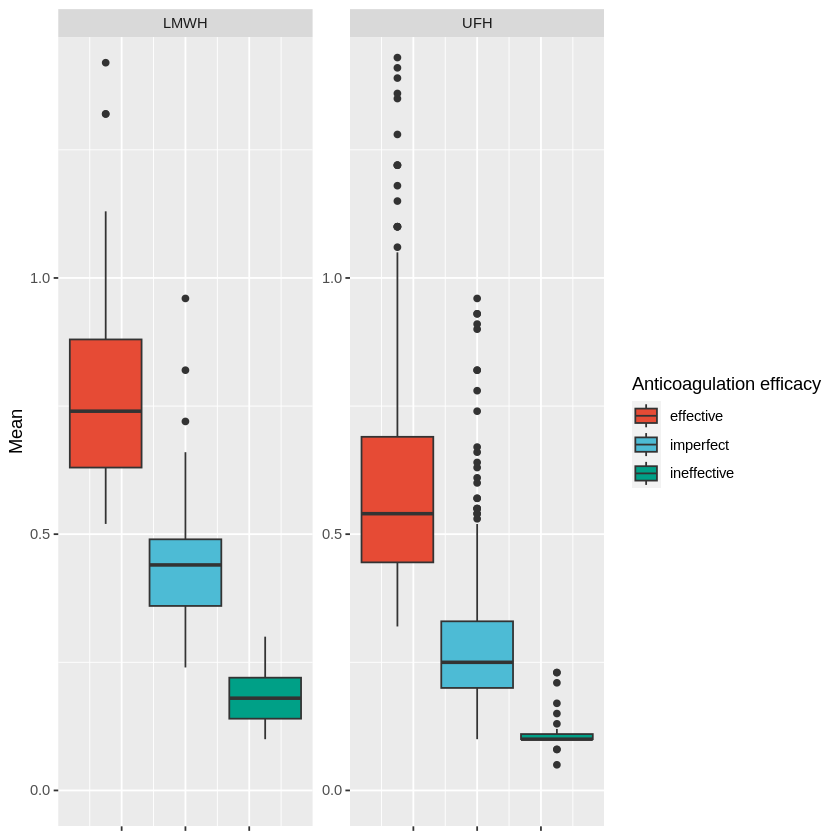

In [111]:
# Boxplot des valeurs moyennes selon le type d'anticoagluation
# Toutes données confondues

donnees_aggregees_filtrees_anticoag %>%
    collect() %>%
    filter(!is.na(moyenne)) %>%
    filter(volonte_anticoag == 1) %>%
    ggplot + geom_boxplot(aes(y = moyenne, fill = efficacite_anticoag)) +
        facet_wrap(~type_anticoag, scale="free_y") +
        coord_cartesian(ylim = c(0, 1.4)) +
        scale_fill_npg() +
        theme(axis.text.x=element_blank()) +
        ylab('Mean') + 
        labs(fill="Anticoagulation efficacy")

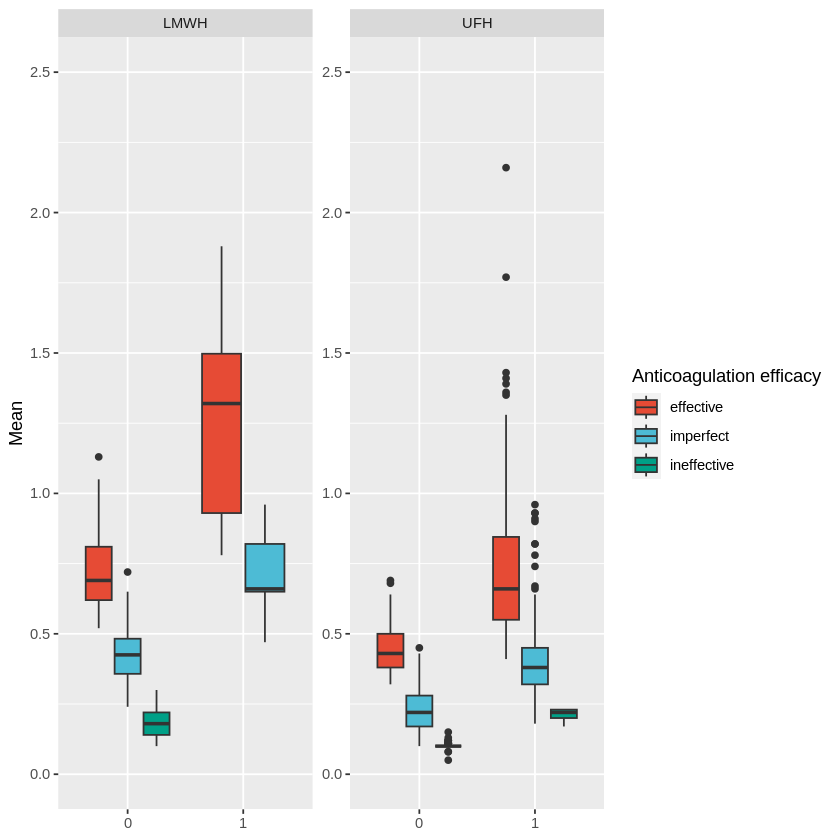

In [109]:
# Boxplot des valeurs moyennes selon la présence d'un surdosage (définition à apprécier dans le NB data_management)
# Toutes données confondues

donnees_aggregees_filtrees_anticoag %>%

# L'exclusion des valeurs NA représente l'ensemble des valeurs non numériques d'anticoagulation. La plupart des 17 enregistrements NaN sont des résultats ininterprétables.
# Il est possible de vérifier la liste des NaN avec ce code depuis la table initiale des labos ; le champ 

    filter(!is.na(overdose)) %>%
    filter(volonte_anticoag == 1) %>%
    ggplot + geom_boxplot(aes(y = moyenne, x = as_factor(overdose), fill = efficacite_anticoag)) +
        facet_wrap(~type_anticoag, scale="free_y") +
        coord_cartesian(ylim = c(0, 2.5)) +
        scale_fill_npg() +
        labs(fill="Anticoagulation efficacy") +
        ylab('Mean') + 
        xlab(NULL)

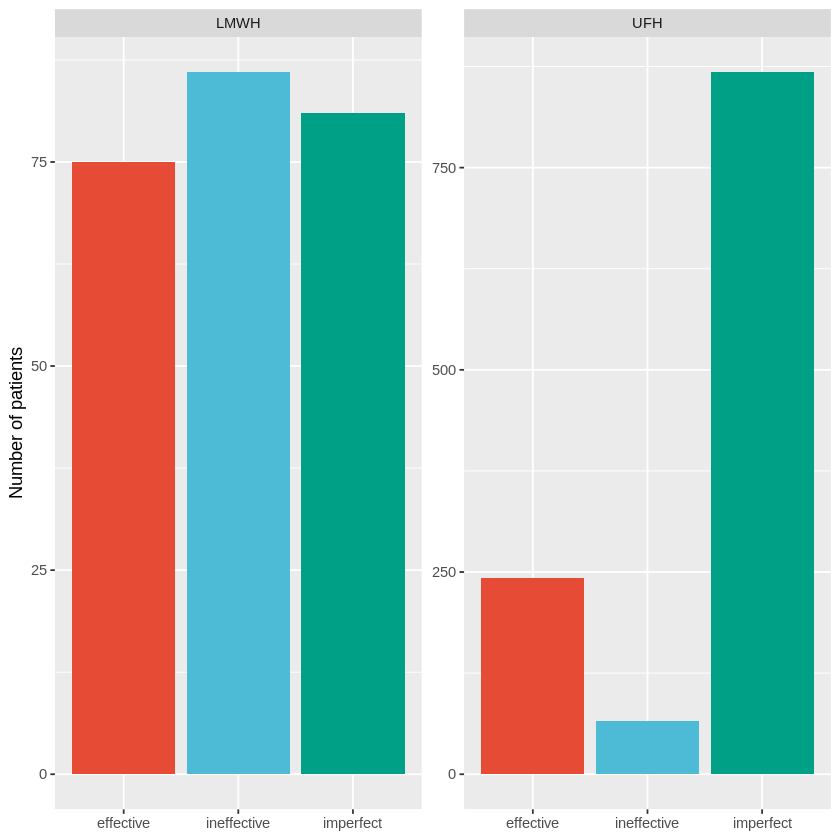

In [114]:
donnees_aggregees_filtrees_anticoag %>%
    filter(volonte_anticoag == 1) %>%
    collect() %>%
    mutate(efficacite_anticoag = as_factor(efficacite_anticoag)) %>%
    ggplot() + geom_bar(aes(x=efficacite_anticoag, fill=efficacite_anticoag)) +
    facet_wrap(~type_anticoag, scale="free_y") +
    scale_fill_npg(labels = NULL, breaks = NULL) + 
    labs(fill="Anticoagulation efficacy") +
    xlab(NULL) + 
    ylab("Number of patients")

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


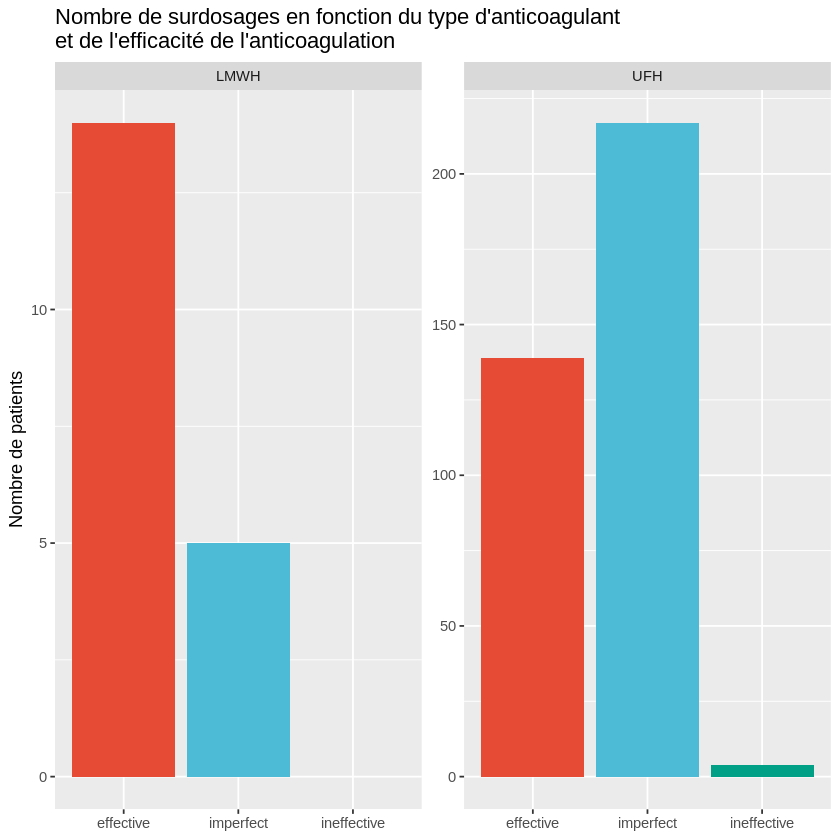

In [116]:
donnees_aggregees_filtrees_anticoag %>%
    filter(overdose == 1 && volonte_anticoag == 1) %>%
    ggplot + geom_bar(aes(x = efficacite_anticoag, fill = efficacite_anticoag)) + facet_wrap(~type_anticoag, scale="free_y") +
        scale_fill_npg(labels = NULL) + 
        ggtitle("Nombre de surdosages en fonction du type d'anticoagulant \net de l'efficacité de l'anticoagulation") +
        xlab(NULL) + 
        ylab("Nombre de patients") +
        scale_fill_npg(labels = NULL, breaks = NULL)

In [26]:
## Tableau des surdosages

donnees_aggregees_filtrees_anticoag %>%
    collect() %>%
    mutate(efficacite_anticoag = as_factor(efficacite_anticoag)) %>%
    group_by(surdosage, type_anticoag) %>%
    summarise(n = n(),
              pct_efficace = round(mean(efficacite_anticoag == "efficace", na.rm = TRUE),2),
              pct_imparfait = round(mean(efficacite_anticoag == "imparfait", na.rm = TRUE),2),
              pct_inefficace = round(mean(efficacite_anticoag == "inefficace", na.rm = TRUE),2)) %>%
    as_tibble()

`summarise()` has grouped output by 'surdosage'. You can override using the
`.groups` argument.


surdosage,type_anticoag,n,pct_efficace,pct_imparfait,pct_inefficace
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
0,aod,230,NaN,NaN,NaN
0,hbpm,449,0.27,0.34,0.39
0,hnf,1198,0.13,0.80,0.08
1,hbpm,29,0.74,0.26,0.00
1,hnf,403,0.39,0.60,0.01
NaN,hbpm,6,0.00,1.00,0.00
NaN,hnf,8,0.00,1.00,0.00


In [27]:
## Tableau des surdosages

donnees_aggregees_filtrees_anticoag %>%
    collect() %>%
    mutate(efficacite_anticoag = as_factor(efficacite_anticoag)) %>%
    group_by(efficacite_anticoag, type_anticoag) %>%
    summarise(n = n(),
              pct_surdosage = round(mean(surdosage == '1'),2)) %>%
    as_tibble()

`summarise()` has grouped output by 'efficacite_anticoag'. You can override
using the `.groups` argument.


efficacite_anticoag,type_anticoag,n,pct_surdosage
<fct>,<chr>,<int>,<dbl>
efficace,hbpm,75,0.19
efficace,hnf,243,0.57
inefficace,hbpm,86,0.00
inefficace,hnf,66,0.06
imparfait,hbpm,83,0.06
imparfait,hnf,871,0.25
NA,aod,230,0.00
NA,hbpm,240,0.04
NA,hnf,429,0.10


In [28]:
sejours_rea_48_heures %>%
    collect() %>%
    filter(volonte_anticoag == 1) %>%
    count(encounter_num) %>%
    count()

n
<int>
1284


In [29]:
sejours_rea_48_heures %>%
    group_by(location_cd) %>%
    summarise(
        nb_sejours = n(),
        nb_anticoagulation = sum(volonte_anticoag)
    ) %>%
    mutate(pct_anticoagulation = round(nb_anticoagulation / nb_sejours * 100, 1)) %>%
    arrange(desc(pct_anticoagulation)) %>%
    as_tibble()

Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”


location_cd,nb_sejours,nb_anticoagulation,pct_anticoagulation
<chr>,<dbl>,<dbl>,<dbl>
UFR:066067,59,37,62.7
UFR:011440,224,135,60.3
UFR:066520,4,2,50.0
UFR:066020,40,18,45.0
UFR:026513,235,104,44.3
UFR:061726,28,12,42.9
UFR:026151,371,151,40.7
UFR:066420,29,11,37.9
UFR:028091,253,96,37.9


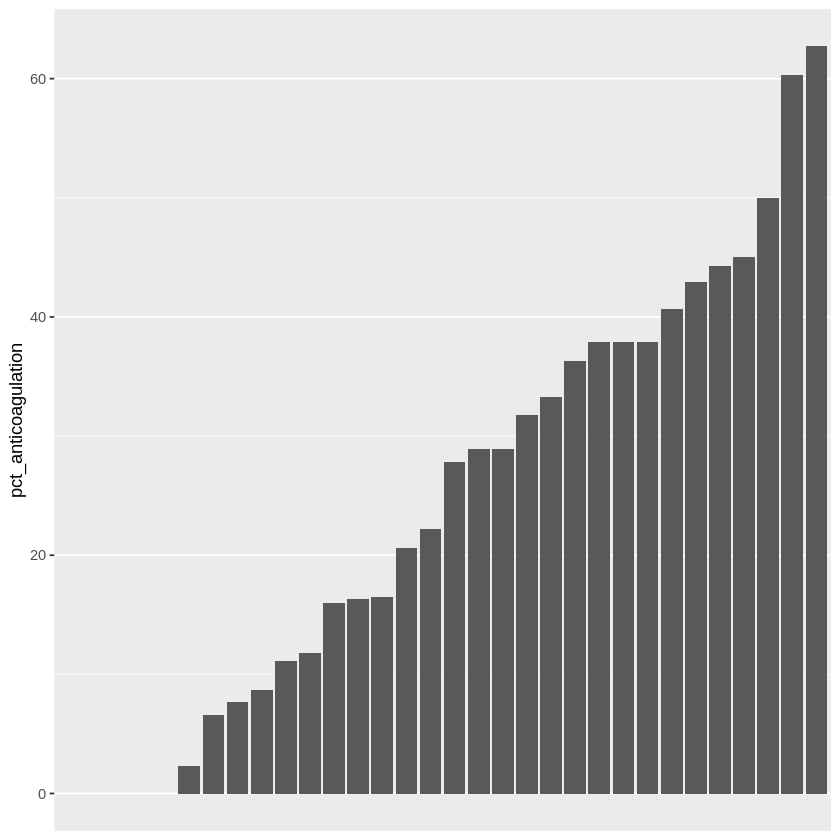

In [30]:
sejours_rea_48_heures %>%
    group_by(location_cd) %>%
    summarise(
        nb_sejours = n(),
        nb_anticoagulation = sum(volonte_anticoag)
    ) %>%
    mutate(pct_anticoagulation = round(nb_anticoagulation / nb_sejours * 100, 1)) %>%
    ggplot() + geom_col(aes(reorder(x = location_cd, pct_anticoagulation), y = pct_anticoagulation)) + 
    xlab(NULL) +
    scale_x_discrete(labels = NULL, breaks = NULL)
    

In [9]:
sejours_rea_48_heures %>%
    mutate(annee=year(end_date_stay)) %>%
    group_by(annee) %>%
    summarise(
        nb_sejours = n(),
        nb_anticoagulation = sum(volonte_anticoag)
    ) %>%
    mutate(pct_anticoagulation = round(nb_anticoagulation / nb_sejours * 100, 1)) %>%
    arrange(desc(annee)) %>%
    as_tibble()

Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”


annee,nb_sejours,nb_anticoagulation,pct_anticoagulation
<int>,<dbl>,<dbl>,<dbl>
2021,227,60,26.4
2020,1044,280,26.8
2019,1079,303,28.1
2018,801,217,27.1
2017,577,155,26.9
2016,399,93,23.3
2015,340,74,21.8
2014,278,55,19.8
2013,173,37,21.4


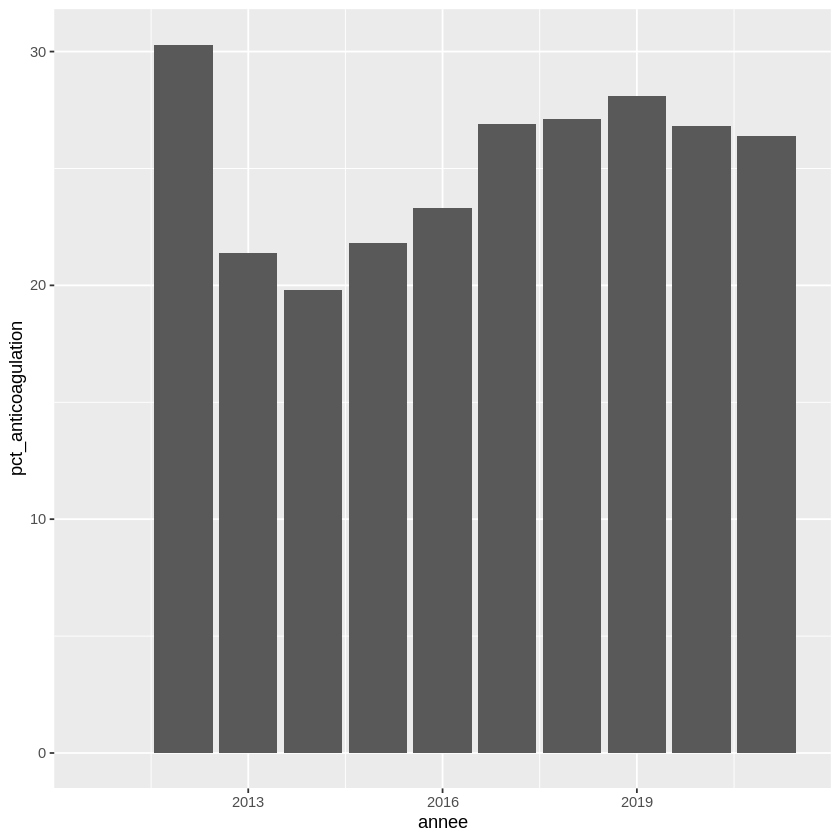

In [32]:
sejours_rea_48_heures %>%
    mutate(annee=year(end_date_stay)) %>%
    collect() %>%
    filter(!is.na(annee)) %>%
    group_by(annee) %>%
    summarise(
        nb_sejours = n(),
        nb_anticoagulation = sum(volonte_anticoag)
    ) %>%
    mutate(pct_anticoagulation = round(nb_anticoagulation / nb_sejours * 100, 1)) %>%
    ggplot() + geom_col(aes(x = annee, y = pct_anticoagulation))

Joining, by = c("encounter_num", "instance_num", "duree_sejour",
"nb_total_tests_par_sejour", "ratio_tests_duree_sejour", "volonte_anticoag")


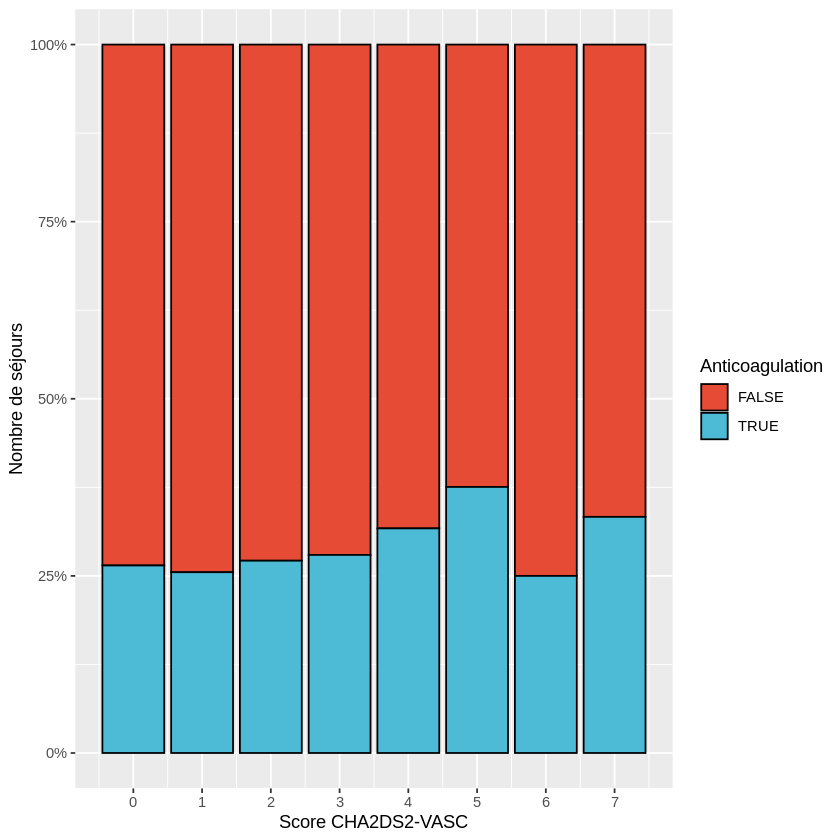

In [33]:
## Barplot du nombre de séjours en fonction du score CHADS-VASCc2, colorés en fonction de la présence d'une anticoagulation

sejours_rea_48_heures %>%
    group_by(encounter_num) %>%
    left_join(donnees_aggregees_filtrees_anticoag %>% filter(volonte_anticoag == '1' && !type_anticoag == 'aod')) %>%
    mutate(anticoagulation = case_when (
        is.na(efficacite_anticoag) ~ FALSE,
        TRUE ~ TRUE
        )) %>%
    ggplot() + geom_bar(aes(x=chads_vasc, fill=anticoagulation), colour = "black", position = "fill") +
        scale_fill_npg() +
        labs(x="Score CHA2DS2-VASC", y="Nombre de séjours", fill="Anticoagulation") +
        scale_x_continuous(breaks = c(0:8)) + 
        scale_y_continuous(labels = scales::percent)

In [10]:
chisq_chads <- sejours_rea_48_heures %>%
    group_by(encounter_num) %>%
    left_join(donnees_aggregees_filtrees_anticoag %>% filter(volonte_anticoag == 1 && !type_anticoag == 'aod')) %>%
    mutate(anticoagulation = case_when (
        is.na(efficacite_anticoag) ~ "FALSE",
        TRUE ~ "TRUE"
        )) %>%
    collect() %>%
    mutate(anticoagulation = recode_factor(anticoagulation, "FALSE" = FALSE, "TRUE" = TRUE)) %>%
    mutate(chads_vasc = recode_factor(chads_vasc, "1" = 1, "2" = 2, "3" = 3, "4" = 4, "5" = 5, "6" = 6, "7" = 7, "8" = 8))

Joining, by = c("encounter_num", "instance_num", "duree_sejour",
"nb_total_tests_par_sejour", "ratio_tests_duree_sejour", "volonte_anticoag")


In [11]:
observed_indep_statistic <- chisq_chads %>%
  specify(anticoagulation ~ chads_vasc) %>%
  hypothesize(null = "independence") %>%
  calculate(stat = "Chisq")

In [12]:
null_dist_sim <- chisq_chads %>%
    specify(anticoagulation ~ chads_vasc) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "Chisq")

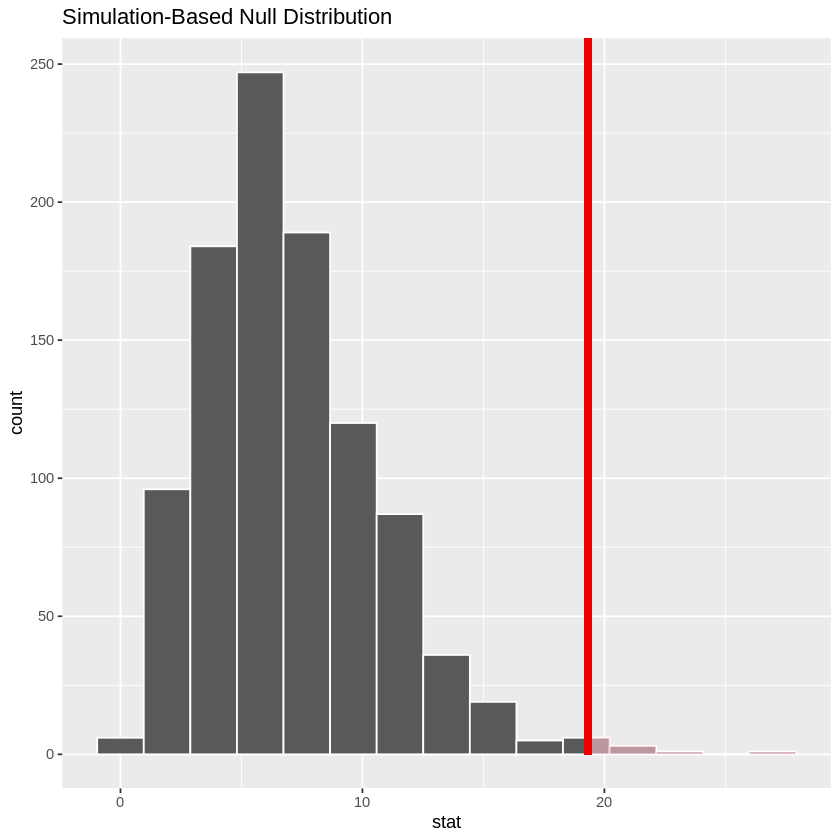

In [13]:
null_dist_sim %>%
  visualize() +
  shade_p_value(observed_indep_statistic, direction = "greater")

Warning message in stats::chisq.test(table(x), ...):
“Chi-squared approximation may be incorrect”


statistic,chisq_df,p_value
<dbl>,<int>,<dbl>
19.30702,7,0.007278058


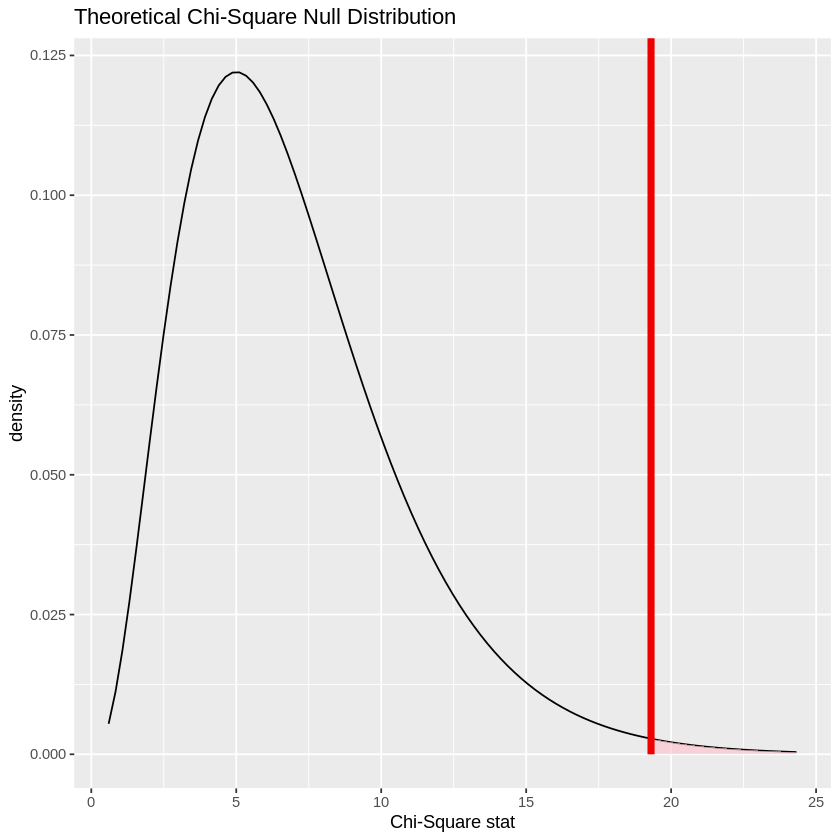

In [14]:
## Test du X² pour déterminer si le score de CHADS-VASC est statistiquement associé à la présence ou non d'une anticoagulation

chisq_chads %>%
    specify(anticoagulation ~ chads_vasc) %>%
    hypothesize(null = "independence") %>%
    assume(distribution = "Chisq") %>%
    visualize() + 
    shade_p_value(observed_indep_statistic, direction = "greater")

chisq_test(chisq_chads, anticoagulation ~ chads_vasc)

In [39]:
## Statistiques des tables de laboratoire en dehors des variables d'anticoagulation

Warning message:
“Removed 13 rows containing non-finite values (`stat_boxplot()`).”


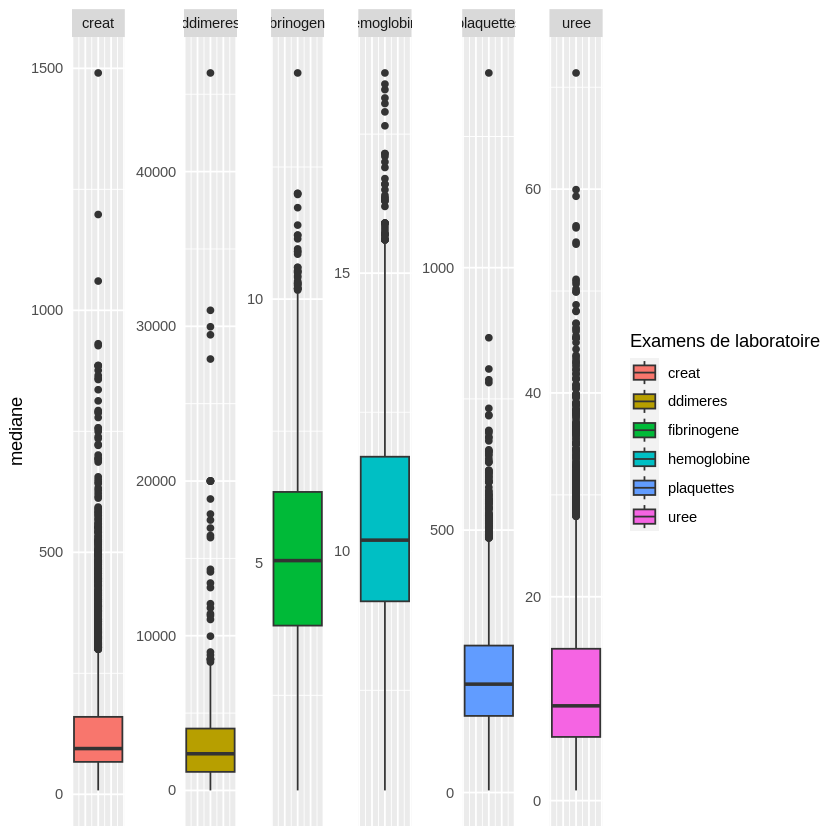

In [40]:
donnees_aggregees_labos %>%
    ggplot() + geom_boxplot(aes(y = mediane, fill = concept_cd_cat)) +
        facet_wrap(~concept_cd_cat, scales ="free", nrow = 1) +
        scale_color_npg() +
        theme(axis.text.x=element_blank(), axis.ticks = element_blank()) +
        labs(fill='Examens de laboratoire')

In [41]:
donnees_aggregees_labos %>%
    collect() %>%
    group_by(concept_cd_cat) %>%
    summarise(nb_sejours = n(),
              nb_tests_moy = round(mean(nb_tests),2),
              nb_tests_max = max(nb_tests),
              nb_tests_min = min(nb_tests),
              moyenne = round(mean(moyenne, na.rm = TRUE),2),
              mediane = round(median(mediane, na.rm = TRUE),2)) %>%
    as_tibble()

concept_cd_cat,nb_sejours,nb_tests_moy,nb_tests_max,nb_tests_min,moyenne,mediane
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
creat,4578,9.77,309,1,138.97,94.50
ddimeres,361,2.61,50,1,3883.37,2370.00
fibrinogene,3524,4.78,137,1,5.17,5.05
hemoglobine,4584,15.28,384,1,10.53,10.20
plaquettes,3925,8.63,192,1,226.76,206.50
uree,4574,9.35,262,1,11.97,9.30
